In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
##features, merged_df, names, locations
run clean_data.py

In [3]:
merged_df

,Name,Difficulty,Distance,Elevation Gain,Route Type,hiking,views,nature trips,walking,birding,...,skiing,historic site,cave,city walk,paddle sports,hot springs,rails trails,beach,location,stars
0,Emerald Lake Trail,MODERATE,3.1 miles,708 feet,Out & Back,1,1,1,1,1,...,0,0,0,0,0,0,0,0,Rocky Mountain National Park,4.7
1,Royal Arch Trail,HARD,3.0 miles,"1,377 feet",Out & Back,1,1,1,1,0,...,0,0,0,0,0,0,0,0,Boulder Open Space,4.6
2,Beaver Brook and Chavez Trail Loop,MODERATE,5.1 miles,"1,105 feet",Loop,1,1,1,1,1,...,0,0,0,0,0,0,0,0,Genesee Park,4.4
3,Hanging Lake Trail,MODERATE,2.8 miles,"1,204 feet",Out & Back,1,1,1,1,1,...,0,0,1,0,0,0,0,0,White River National Forest,4.8
4,Maxwell Falls Lower Trail,MODERATE,4.2 miles,875 feet,Loop,1,1,0,0,0,...,0,0,0,0,0,0,0,0,Arapaho National Forest,4.1
5,Sky Pond via Glacier Gorge Trail,HARD,8.1 miles,"1,765 feet",Out & Back,1,1,1,1,1,...,0,0,0,0,0,0,0,0,Rocky Mountain National Park,4.9
6,Mount Sanitas and Sanitas Valley Loop Trail,MODERATE,3.2 miles,"1,256 feet",Loop,1,1,1,1,1,...,0,0,0,0,0,0,0,0,Boulder Open Space,4.3
7,Mount Bierstadt Trail,HARD,6.9 miles,"2,729 feet",Out & Back,1,1,1,1,1,...,1,0,0,0,0,0,0,0,Mount Evans Wilderness,4.6
8,Gem Lake Trail,MODERATE,3.1 miles,990 feet,Out & Back,1,1,1,1,0,...,0,0,0,0,0,0,0,0,Rocky Mountain National Park,4.4
9,Saint Mary's Glacier,EASY,1.9 miles,807 feet,Out & Back,1,1,1,1,0,...,0,0,0,0,0,0,0,0,Arapaho National Forest,4.5


In [4]:
plt.rcParams['patch.force_edgecolor'] = True

In [19]:
t = merged_df.groupby(['Difficulty'])['Difficulty'].count()

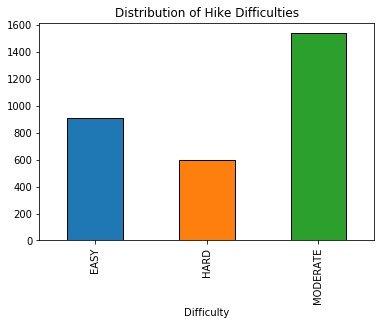

In [21]:
t.plot(kind = 'bar', title = 'Distribution of Hike Difficulties')

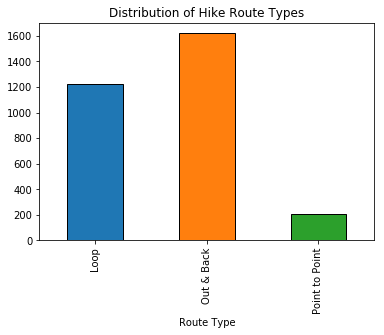

In [55]:
t = merged_df.groupby(['Route Type'])['Route Type'].count()
t.plot(kind = 'bar', title = 'Distribution of Hike Route Types')

In [93]:
t = merged_df.groupby(['location'])['location'].count()
t_sort = t.sort_values(ascending = False)
top_10 = t_sort[:10]
labels = top_10.index
t_sort
top_20 = t_sort[:20]
labels_20 = top_20.index

Text(0.5,1,'Top 20 Hiking Locations by Number of Hikes')

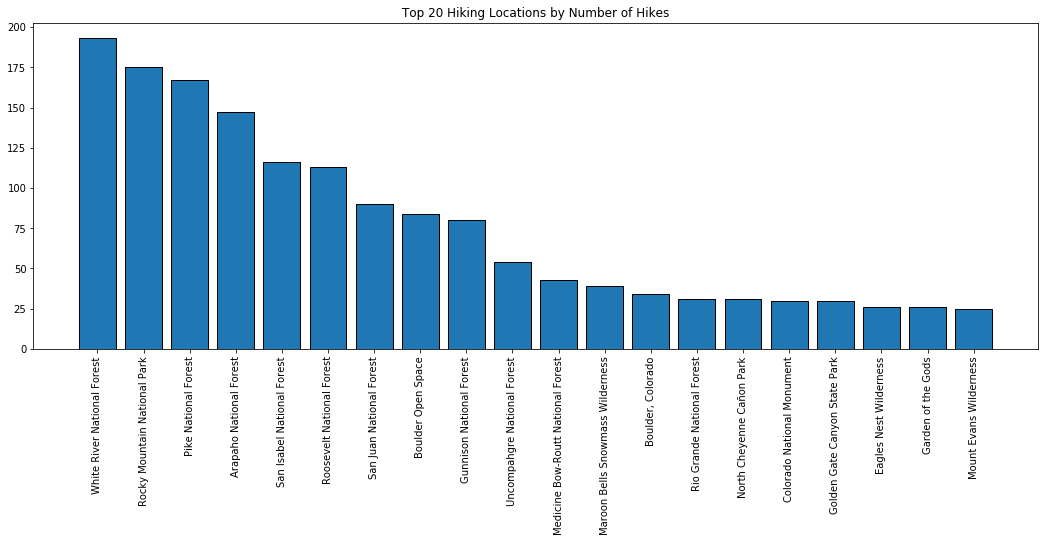

In [96]:
fig = plt.figure(figsize = (18,6))
ax = fig.add_subplot(111)
ax.grid(False)

ax.bar(range(20), top_20, tick_label = labels_20)
x = range(len(labels_20))
plt.xticks(x,  labels_20, rotation = 'vertical')
ax.set_title('Top 20 Hiking Locations by Number of Hikes')

In [ ]:
# features['Distance'].describe()

In [291]:
features['elevation_gain'].describe()

count     3048.000000
mean      1549.575131
std       1734.369787
min          0.000000
25%        393.000000
50%       1066.000000
75%       2162.750000
max      31873.000000
Name: elevation_gain, dtype: float64

In [292]:
features[features['elevation_gain'] == 31873.0]

,Distance,elevation_gain,hiking,views,nature trips,walking,birding,wild flowers,forest,wildlife,...,historic site,cave,city walk,paddle sports,hot springs,rails trails,beach,stars,difficulty,route
1815,70.6,31873,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,5.0,1,2


In [293]:
names[1815]

'Mount Shavano, Mount Antero, Mount Princeton, Mount Yale, Mount Harvard, Mount Oxford, and La Pata Peak Trail'

In [36]:
features = features.drop(features[features['Distance'] == 234.1].index)

In [37]:
features['Distance'].describe()

count    3048.000000
mean        7.700787
std         9.635757
min         0.000000
25%         2.900000
50%         5.700000
75%         9.800000
max       230.600000
Name: Distance, dtype: float64

Text(0.5,1,'Hike Distance Distribution')

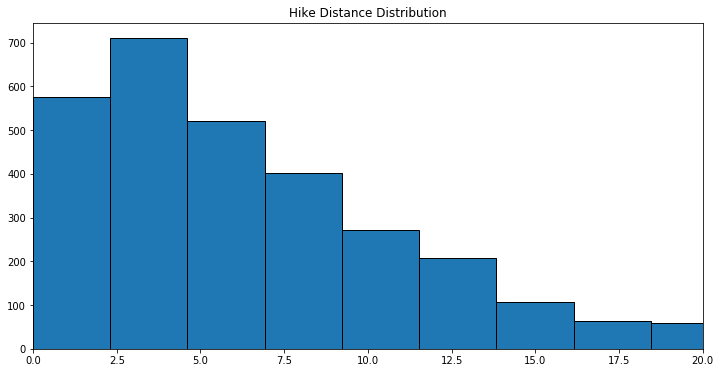

In [53]:
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(111)
ax.grid(False)
ax.hist(features['Distance'], bins = 100)
ax.set_xlim(0,20)
ax.set_title('Hike Distance Distribution')

In [54]:
# features.sort_values(by = ['Distance'], ascending = False)

In [281]:
labels
test = merged_df[merged_df['location'].isin(labels_20)]


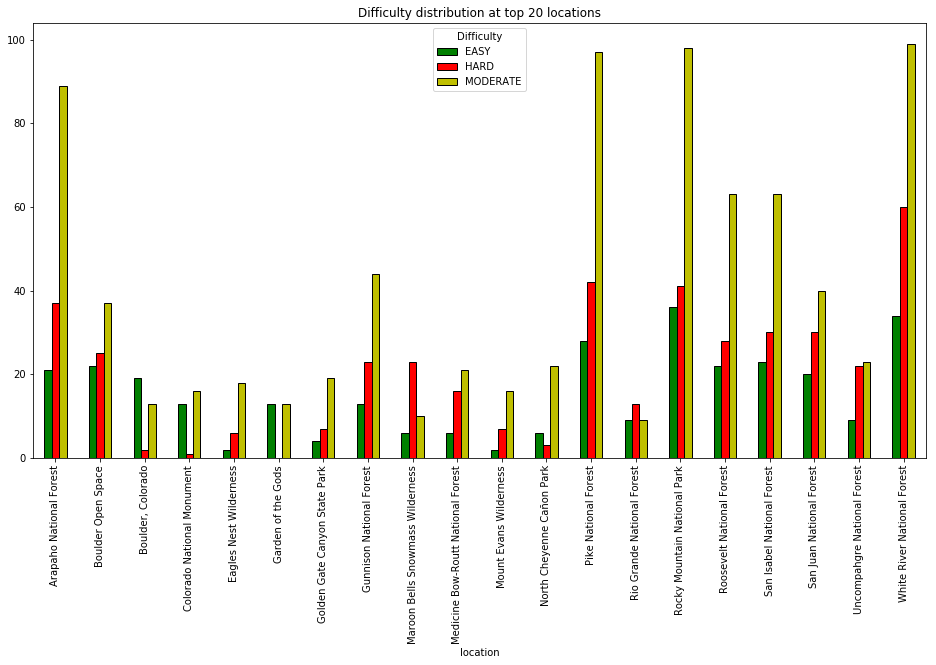

In [283]:
test.groupby(['location','Difficulty']).size().unstack().plot(kind='bar',figsize = (16,8), color = ['g','r','y'], 
                                                              title = 'Difficulty distribution at top 20 locations')

In [97]:
features.columns

Index(['Distance', 'elevation_gain', 'hiking', 'views', 'nature trips',
       'walking', 'birding', 'wild flowers', 'forest', 'wildlife',
       'trail running', 'dogs on leash', 'kid friendly', 'mountain biking',
       'lake', 'dog friendly', 'river', 'horseback riding', 'no dogs',
       'camping', 'snowshoeing', 'backpacking', 'waterfall', 'fishing',
       'off road driving', 'cross country skiing', 'scenic driving',
       'rock climbing', 'road biking', 'wheelchair friendly', 'skiing',
       'historic site', 'cave', 'city walk', 'paddle sports', 'hot springs',
       'rails trails', 'beach', 'stars', 'difficulty', 'route'],
      dtype='object')

In [98]:
tags = features.drop(['Distance','elevation_gain','stars','difficulty','route'],axis = 1)

In [174]:
tag_sums = tags.sum()
tag_labels = tag_sums.index

Text(0.5,1,'Most common features across all Colorado hikes')

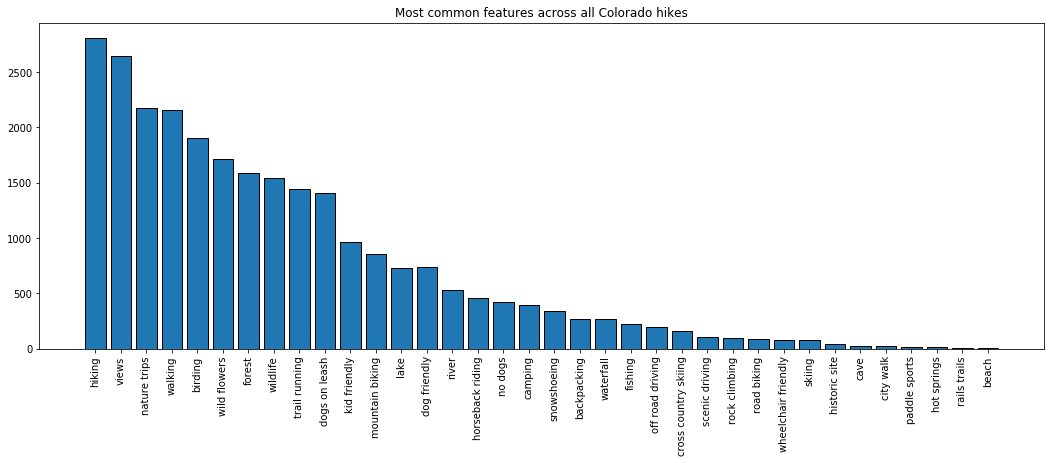

In [111]:
fig = plt.figure(figsize = (18,6))
ax = fig.add_subplot(111)
ax.grid(False)

ax.bar(range(len(tag_labels)), tag_sums, tick_label = tag_labels)
x = range(len(tag_labels))
plt.xticks(x,  tag_labels, rotation = 'vertical')
ax.set_title('Most common features across all Colorado hikes')

Text(0.5,1,'All trails star rating distribution')

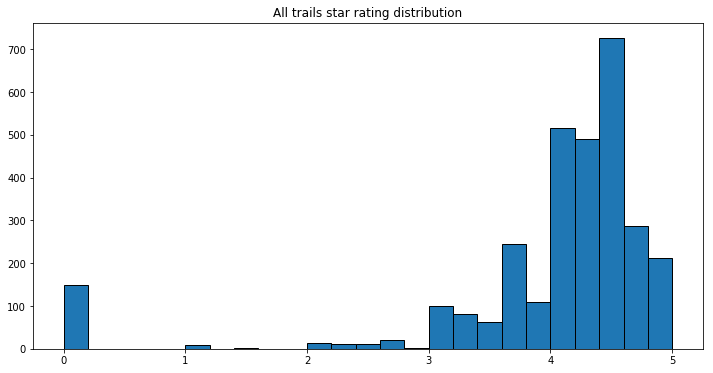

In [110]:
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(111)
ax.grid(False)
ax.hist(features['stars'], bins = 25)
ax.set_title('All trails star rating distribution')

Text(0.5,1,'All trails elevation rating distribution')

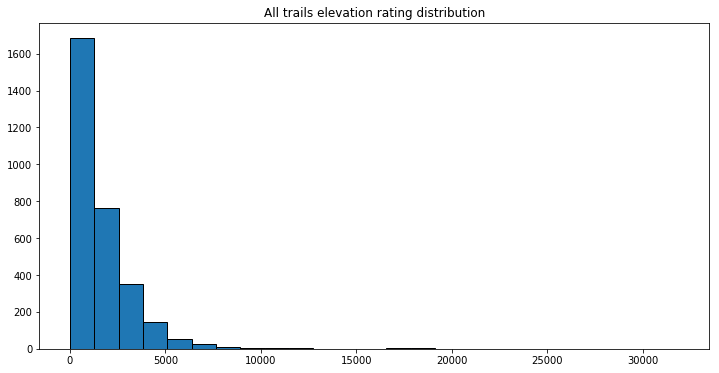

In [290]:
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(111)
ax.grid(False)
ax.hist(features['elevation_gain'], bins = 25)
ax.set_title('All trails elevation rating distribution')

In [135]:
merged_df['stars'] = merged_df.stars.astype(float)
merged_df['Distance'] = merged_df['Distance'].str.replace('miles','')
merged_df['Distance'] = merged_df['Distance'].str.replace('km','')
merged_df['Distance'] = merged_df.Distance.astype(float)


In [286]:
merged_df['Elevation Gain'] = merged_df['Elevation Gain'].str.replace('feet','')
merged_df['Elevation Gain'] = merged_df['Elevation Gain'].str.replace('m','')
merged_df['Elevation Gain'] = merged_df['Elevation Gain'].str.replace(',','')
merged_df['Elevation Gain'] = pd.to_numeric(merged_df['Elevation Gain'])

Text(0.5,1,'Average All Trails user ratings by location')

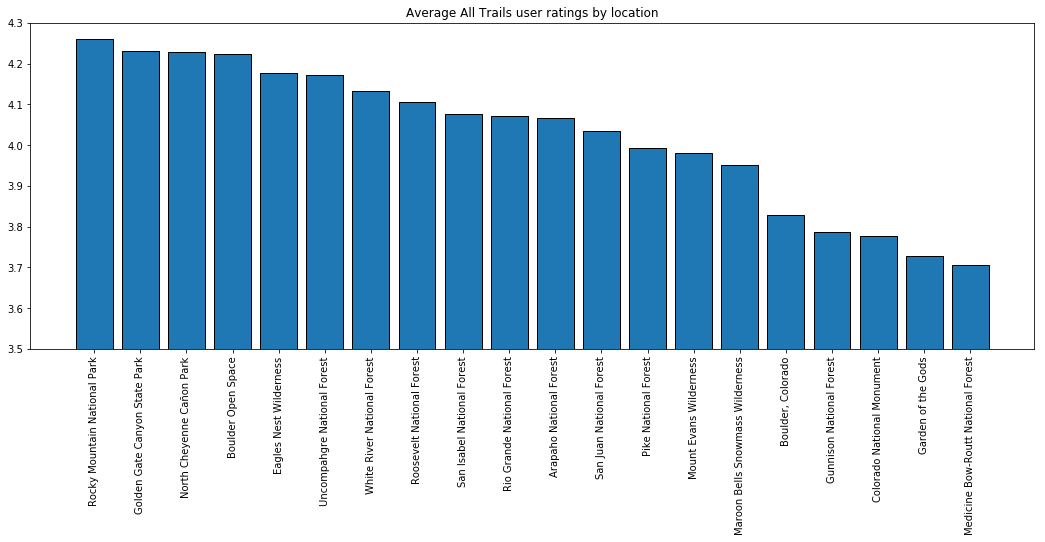

In [130]:
test2 = merged_df[merged_df['location'].isin(labels_20)]

loc_stars = test2.groupby(['location'])['stars'].mean()
loc_sorted = loc_stars.sort_values(ascending = False)
labels = loc_sorted.index

fig = plt.figure(figsize = (18,6))
ax = fig.add_subplot(111)
ax.grid(False)

ax.bar(range(len(labels)), loc_sorted, tick_label = labels)
x = range(len(labels))
plt.xticks(x,  labels, rotation = 'vertical')
ax.set_ylim(3.5,4.3)
ax.set_title('Average All Trails user ratings by location')

Text(0.5,1,'Average elevation gain by location')

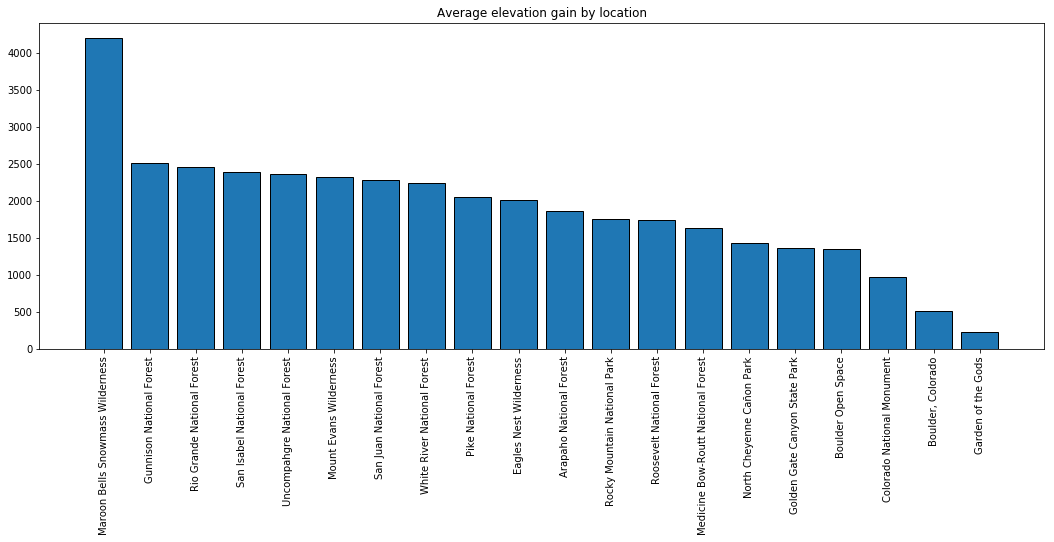

In [288]:
test2 = merged_df[merged_df['location'].isin(labels_20)]

loc_stars = test2.groupby(['location'])['Elevation Gain'].mean()
loc_sorted = loc_stars.sort_values(ascending = False)
labels = loc_sorted.index

fig = plt.figure(figsize = (18,6))
ax = fig.add_subplot(111)
ax.grid(False)

ax.bar(range(len(labels)), loc_sorted, tick_label = labels)
x = range(len(labels))
plt.xticks(x,  labels, rotation = 'vertical')
ax.set_title('Average elevation gain by location')

In [ ]:
test2 = merged_df[merged_df['location'].isin(labels_20)]

loc_stars = test2.groupby(['location'])['elevation_gain'].mean()
loc_sorted = loc_stars.sort_values(ascending = False)
labels = loc_sorted.index

fig = plt.figure(figsize = (18,6))
ax = fig.add_subplot(111)
ax.grid(False)

ax.bar(range(len(labels)), loc_sorted, tick_label = labels)
x = range(len(labels))
plt.xticks(x,  labels, rotation = 'vertical')
ax.set_title('Average hiking distance by location')

In [246]:
test2.columns

Index(['Name', 'Difficulty', 'Distance', 'Elevation Gain', 'Route Type',
       'hiking', 'views', 'nature trips', 'walking', 'birding', 'wild flowers',
       'forest', 'wildlife', 'trail running', 'dogs on leash', 'kid friendly',
       'mountain biking', 'lake', 'dog friendly', 'river', 'horseback riding',
       'no dogs', 'camping', 'snowshoeing', 'backpacking', 'waterfall',
       'fishing', 'off road driving', 'cross country skiing', 'scenic driving',
       'rock climbing', 'road biking', 'wheelchair friendly', 'skiing',
       'historic site', 'cave', 'city walk', 'paddle sports', 'hot springs',
       'rails trails', 'beach', 'location', 'stars'],
      dtype='object')

In [276]:
one = test2.groupby(['location']).agg({'hiking': 'sum', 'views': 'sum', 'dog friendly': 'sum', 'lake': 'sum', 'forest': 'sum',
                                'wildlife': 'sum'})

two = test2.groupby(['location'])['Name'].count()

df_test = pd.concat([one,two], axis = 1)

cols = df_test.columns[:10]

for col in cols:
    df_test[col] = df_test[col] / df_test['Name']



In [277]:
plot_df = df_test.drop(['Name'], axis = 1)

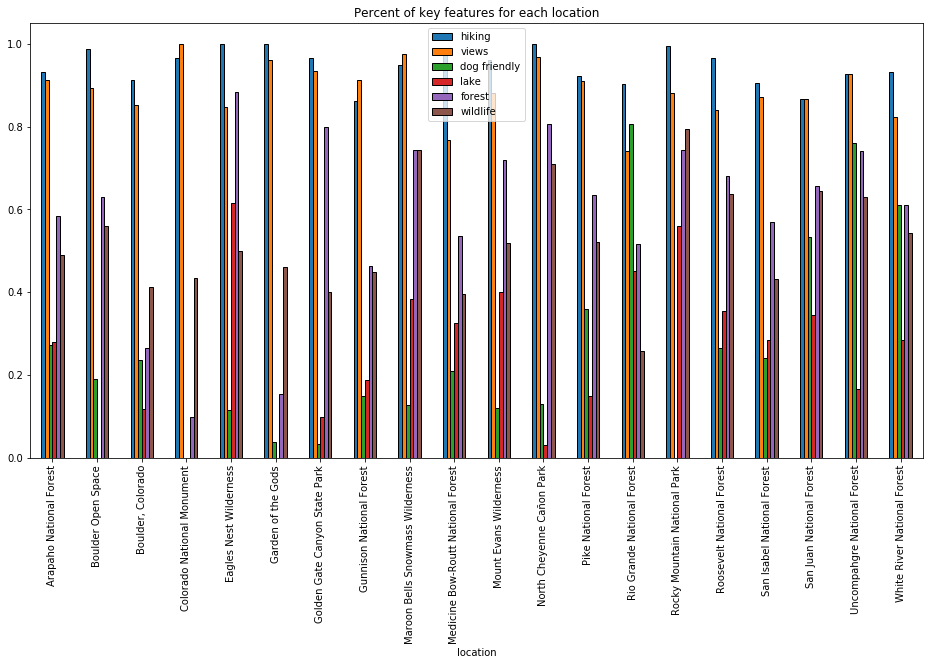

In [278]:
plot_df.plot(kind='bar',figsize=(16,8), title='Percent of key features for each location')